# Setup

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



# Loading and exploring the data

In [ ]:
def load_data(filepath):                #air_quality_df = pd.read_csv("C:/Maestría Inteligencia artificial aplicada/Trimestre 5 (Deep Learning & MLOps)/MLOps/Virtual_Env_MLOps/itesm_venv/AirQualityUCI.csv")
    data = pd.read_csv(filepath)
    return data

In [ ]:
def eda (data):
    print(data.head().T)
    print(data.describe())
    print(data.info())

The variable to be predicted is the one called "CO(GT)

# Exploration Data Analysis (EDA)

We use the function .info() to know the type of variables that are contained in the dataframe

In [195]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


We see that the columns called "Unnammed:15" and "Unnamed:16" do not contain any information thus we proceed to eliminate them to avoid clutter in the model

In [196]:
air_quality_df = air_quality_df.drop(columns=['Unnamed: 15','Unnamed: 16'])


Based on the information provided by the dataset creator, the samples which has missing values were registered as "-200", so we are going input again an NaN to the samples that fall into this category

In [197]:
df = air_quality_df.map(lambda x :np.nan if x==-200 else x)
df = df.iloc[:9357]


Now we are going to analyze the percentage of missing values of each category

In [198]:
percentage_of_missing_values =(df.isna().sum()/len(df))*100
percentage_of_missing_values

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

The column "NMHC(GT)", has 90% of missing values, thus we decided to remove from the dataset

In [199]:
df = df.drop(columns=['NMHC(GT)'])

# Add visualizations to the dataset

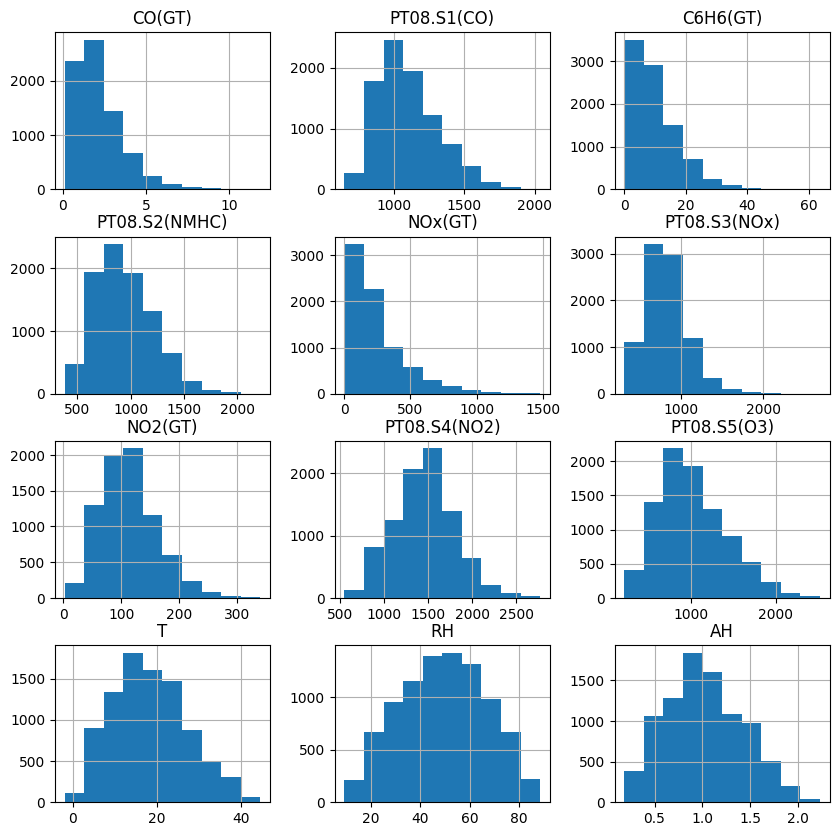

In [200]:
df.hist(bins=10,figsize=(10,10))
plt.show()

# Correlation

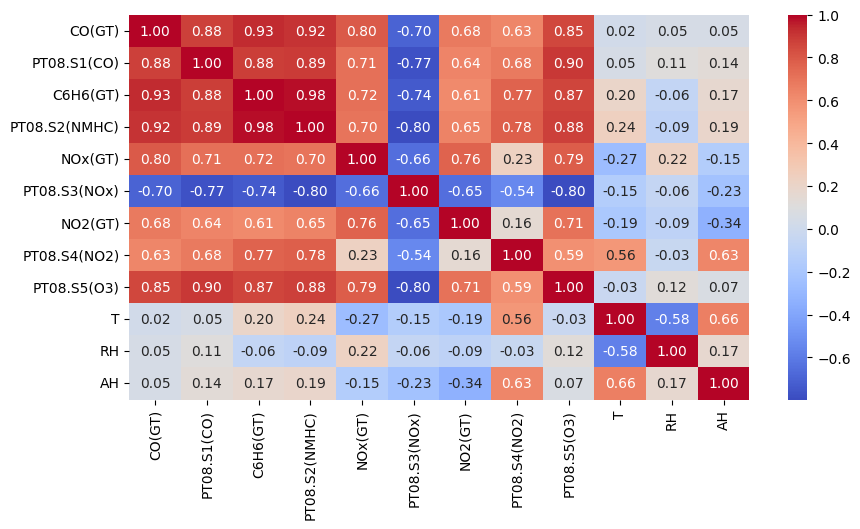

In [201]:
num_var_list =['CO(GT)','PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']
corr_df =df[num_var_list]
corr_df
plt.figure(figsize=(10,5))
sns.heatmap(corr_df.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

As shown above, th variables that have a higher correlation with our target variable are C6H6 (NMHC), PT08.S2(NMHC) and PT08.S1(CO)

# Preprocessing and Feature Engineering

Separate the target variable from the predictors or variables which are going to be trained 

In [202]:
X = df.drop(columns=['Date','Time','CO(GT)'])


In [203]:
X = X.apply(lambda col: col.fillna(col.mean()))

In [204]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [205]:
y = df[['CO(GT)']].copy()

In [206]:
y = y.apply(lambda col:col.fillna(col.mean()),axis=0)

In the following code there will be prepared a transformer that will be called preprocessing to apply the MinMax transformation

# Splitting the dataset

In [207]:
Xtrain, X_temp, ytrain, ytemp = train_test_split(X, y, test_size=0.3, random_state=27)
Xval, Xtest, yval, ytest = train_test_split(X_temp, ytemp, test_size=0.5, random_state=27)

# Training the model

In [208]:
lr_model = LinearRegression()
lr_model.fit(Xtrain,ytrain)


LinearRegression()

# Evaluating the model

In [209]:
y_pred = lr_model.predict(Xval)

In [213]:
rmse = mean_squared_error(yval, y_pred,squared=False)

# Calcula el 𝑅²
r2 = r2_score(yval, y_pred)

#imprimimos los resultados
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

RMSE: 0.5684
R²: 0.8011


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Improving the model

In [216]:
# We will create another pipeline with polynomial regression with a degree of two
lr_model2 = Pipeline([
    ('polynomial',PolynomialFeatures(degree=2,include_bias = False)),
    ('regression',LinearRegression())
])

In [217]:
lr_model2.fit(Xtrain,ytrain)
y_pred = lr_model2.predict(Xtest)


In [218]:
rmse = mean_squared_error(ytest,y_pred,squared = False)
r2 = r2_score(ytest,y_pred)
print(f'RMSE: {rmse:.4f}')
print(f'R2: {r2:.4f}')

RMSE: 0.5568
R2: 0.8271


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
